# Signal analysis - lab 01
### Dawid Karpiński, 8.03.2024 r.

## Introduction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal as signal
from matplotlib.transforms import blended_transform_factory

In [2]:
sample_rate, wave = scipy.io.wavfile.read("./chord.wav")

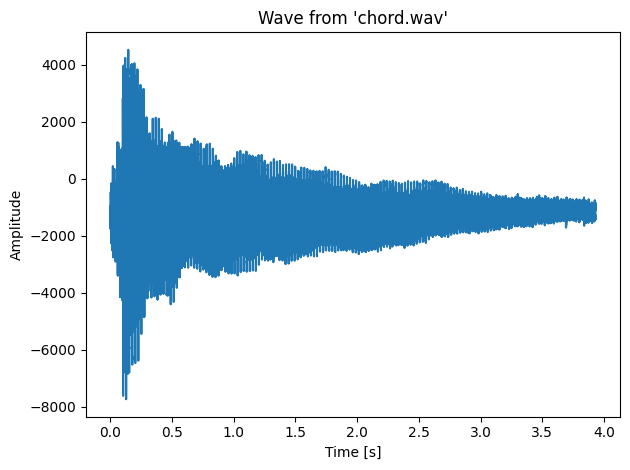

In [3]:
wave = wave[int(8.6e4) :]
time = np.arange(wave.size) / sample_rate

plt.plot(time, wave)
plt.title("Wave from 'chord.wav'")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [4]:
spectrum = np.fft.fft(wave)
freqs = np.fft.fftfreq(wave.size, 1 / sample_rate)

f_range = (freqs >= 16) & (freqs <= 4e3)
freqs = freqs[f_range]
spectrum = spectrum[f_range]

spectrum_db = 10 * np.log10(np.abs(spectrum) + 1e-15)

In [5]:
peaks, _ = signal.find_peaks(spectrum_db, distance=100)
peaks = peaks[np.argsort(spectrum_db[peaks])[-11:]]

In [6]:
# range 8 * 12 = 39 + 57
min_note = -57
max_note = 39

base_names = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

tone_freqs = 440 * np.power(2, np.arange(min_note, max_note + 1) / 12)
tone_names = [
    *[
        f"{base_names[halftone]}{octave}"
        for octave in range(8)
        for halftone in range(12)
    ],
    "C8",
]

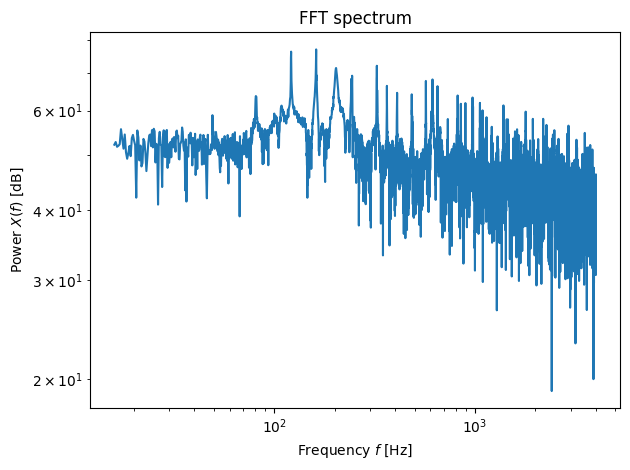

In [7]:
plt.loglog(freqs, spectrum_db)
plt.title("FFT spectrum")
plt.xlabel(r"Frequency $f$ [Hz]")
plt.ylabel(r"Power $X(f)$ [dB]")
plt.tight_layout()
plt.show()

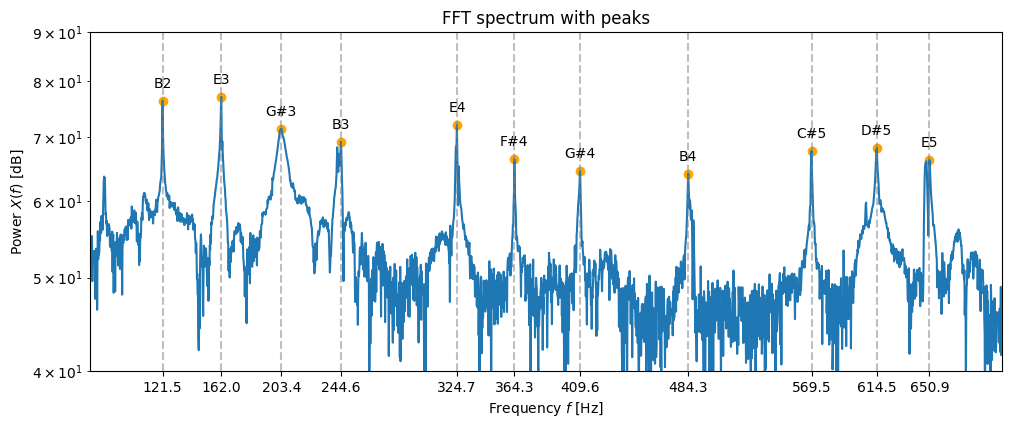

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))

ax.scatter(freqs[peaks], spectrum_db[peaks], c="orange")
ax.semilogy(freqs, spectrum_db)

for freq_peak, peak_value in zip(freqs[peaks], spectrum_db[peaks]):
    idx = np.abs(tone_freqs - freq_peak).argmin()
    ax.annotate(
        tone_names[idx],
        xy=(freq_peak, peak_value),
        xytext=(0, 10),
        textcoords="offset pixels",
        horizontalalignment="center",
        verticalalignment="bottom",
    )
    ax.axvline(x=freq_peak, c="gray", alpha=0.5, linestyle="--")
    # ax.annotate(
    #     f"{tone_freqs[idx]:.2f}",
    #     xy=(freq_peak, 0),
    #     xycoords=blended_transform_factory(ax.transData, ax.transAxes),
    #     xytext=(0, -50),
    #     textcoords="offset pixels",
    #     horizontalalignment="center",
    #     verticalalignment="top",
    #     rotation=-90,
    #     arrowprops=dict(facecolor="black", arrowstyle="->", lw=2),
    # )

ax.set_xticks(freqs[peaks])

ax.set_xlim(-50 + sorted(freqs[peaks])[0], 50 + sorted(freqs[peaks])[-1])
ax.set_ylim(40, 90)

fig.tight_layout()
ax.set_title("FFT spectrum with peaks")
ax.set_xlabel(r"Frequency $f$ [Hz]")
ax.set_ylabel(r"Power $X(f)$ [dB]")
plt.show()